In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as na

import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
df = pd.read_csv('E:/Data Analytics/workshop/ABD vs Bumrah-20220218T052448Z-001/ABD vs Bumrah/IPL_ball_by_ball_updated.csv')

In [3]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.innings.unique()

df = df[(df.wicket_type != 'run out')]
df = df[(df.wicket_type != 'retired hurt')]
df = df[(df.wicket_type != 'obstructing the field')]

df.wicket_type.unique()

array([nan, 'caught', 'bowled', 'lbw', 'stumped', 'caught and bowled',
       'hit wicket'], dtype=object)

In [5]:
df = df[(df.innings == 1) | (df.innings == 2)]
df.player_dismissed.unique()

array([nan, 'JH Kallis', 'W Jaffer', 'V Kohli', 'R Dravid', 'Z Khan',
       'SB Joshi', 'MV Boucher', 'B Akhil', 'CL White', 'SC Ganguly',
       'DJ Hussey', 'RT Ponting', 'M Kaif', 'DS Lehmann', 'M Rawat',
       'RA Jadeja', 'T Kohli', 'SK Warne', 'V Sehwag', 'KC Sangakkara',
       'SK Raina', 'JDP Oram', 'PA Patel', 'MS Dhoni', 'ML Hayden',
       'JR Hopes', 'Yuvraj Singh', 'K Goel', 'SB Styris', 'AS Yadav',
       'SB Bangar', 'WPUJC Vaas', 'A Symonds', 'Y Venugopal Rao',
       'RG Sharma', 'AC Gilchrist', 'VVS Laxman', 'Mohammad Hafeez',
       'WP Saha', 'BB McCullum', 'PR Shah', 'AM Nayar', 'RV Uthappa',
       'L Ronchi', 'SM Pollock', 'LRPL Taylor', 'S Chanderpaul',
       'Kamran Akmal', 'YK Pathan', 'DPMD Jayawardene', 'IK Pathan',
       'B Lee', 'G Gambhir', 'Shahid Afridi', 'ST Jayasuriya', 'MA Khote',
       'Harbhajan Singh', 'DJ Bravo', 'MEK Hussey', 'GC Smith',
       'SR Watson', 'SS Tiwary', 'S Sohal', 'PP Chawla', 'S Sreesanth',
       'RR Sarwan', 'M Kartik',

In [6]:
df.innings.unique()


array([2, 1], dtype=int64)

In [7]:
df[df.bowling_team == 'Mumbai Indians']['bowler'].unique()

array(['DS Kulkarni', 'Harbhajan Singh', 'A Nehra', 'AM Nayar',
       'ST Jayasuriya', 'SM Pollock', 'MA Khote', 'DJ Bravo',
       'VS Yeligati', 'SD Chitnis', 'CRD Fernando', 'DJ Thornely',
       'RR Raje', 'DR Smith', 'A Nel', 'SL Malinga', 'Z Khan',
       'SR Tendulkar', 'JP Duminy', 'GR Napier', 'C Nanda', 'AM Rahane',
       'RA Shaikh', 'R McLaren', 'R Sathish', 'AG Murtaza', 'KA Pollard',
       'AN Ahmed', 'STR Binny', 'JEC Franklin', 'MM Patel', 'RG Sharma',
       'A Symonds', 'TL Suman', 'RW Price', 'PP Ojha', 'RP Singh',
       'CJ McKay', 'NLTC Perera', 'RJ Peterson', 'R Shukla', 'JJ Bumrah',
       'MG Johnson', 'JDP Oram', 'R Dhawan', 'YS Chahal', 'P Suyal',
       'GJ Maxwell', 'NM Coulter-Nile', 'CJ Anderson', 'P Kumar',
       'LMP Simmons', 'S Gopal', 'K Santokie', 'M de Lange',
       'R Vinay Kumar', 'J Suchith', 'MJ McClenaghan', 'HH Pandya',
       'TG Southee', 'KH Pandya', 'N Rana', 'KV Sharma', 'M Markande',
       'Mustafizur Rahman', 'PJ Sangwan', 'BCJ C

In [8]:
#AB de Villiers
#JJ Bumrah
df = df[(df.wides != 1.)]
df = df[(df.wides != 2.)]
df = df[(df.wides != 3.)]
df = df[(df.wides != 4.)]
df = df[(df.wides != 5.)]
len(df)
df.wides.unique()

array([nan])

In [9]:
def matchUps(batsman,bowler,df):
    Req_df = df[(df.striker == batsman) & (df.bowler == bowler)]
    Req_df.head()
    Runs_Scored =sum(Req_df.runs_off_bat)
    Balls_Faced = len(Req_df)
    Strike_Rate =100* sum(Req_df.runs_off_bat)/len(Req_df)
    Runs_Scored, Balls_Faced, Strike_Rate
    Dimissal = len(Req_df[Req_df.player_dismissed == batsman])
    df = pd.DataFrame({'Player Name': [batsman],'Runs Scored' :[Runs_Scored], 'Balls Faced' : [Balls_Faced], 'Strike Rate' : [Strike_Rate], 'Bowler' : [bowler], 'No. of Dismissals':[Dimissal]})
    return df


def bowlersBestBatsman(bowler,df):
    df = df[df.bowler == bowler]
    Bdf1 = pd.DataFrame(df.groupby('striker')['runs_off_bat'].sum()).reset_index()
    Bdf2 = pd.DataFrame(df.groupby('striker')['ball'].count()).reset_index()
    Bdf3 = Bdf1.merge(Bdf2, on = 'striker', how='left')
    Bdf3['Strike_Rate'] = 100*(Bdf3.runs_off_bat/Bdf3.ball)
    Bdf4 =Bdf3.sort_values(by = ['runs_off_bat'] , ascending=False) 
    Bowler_Best_batsmen = Bdf4[Bdf4.ball >= 30]
    Bowler_Best_batsmen.reset_index(inplace = True, drop = True)
    plt.figure(figsize = (30,20))
    plt.scatter(Bowler_Best_batsmen.Strike_Rate , Bowler_Best_batsmen.runs_off_bat)
    for i in range (len(Bowler_Best_batsmen)):
        if Bowler_Best_batsmen.Strike_Rate[i] > 120:
            if Bowler_Best_batsmen.runs_off_bat[i] > 60 :
                plt.text(Bowler_Best_batsmen.Strike_Rate[i] , Bowler_Best_batsmen.runs_off_bat[i], Bowler_Best_batsmen.striker[i] , color='Red' , fontsize = 15)

    plt.title(bowler + ' Best batsmen who face more than 30 balls' , fontsize=30)
    plt.axvline(120 , ls= '--')
    plt.axhline(60 , ls='--')
    plt.xlabel('Strike_Rate')
    plt.ylabel('Runs_Scored')
    plt.show()

    
def batsmanFavBowler(batsman , df):
    Abd_df = df[df.striker == batsman]
    Abddf1 = pd.DataFrame(Abd_df.groupby('bowler')['runs_off_bat'].sum()).reset_index()
    Abddf2 = pd.DataFrame(Abd_df.groupby('bowler')['ball'].count()).reset_index()
    Abddf3 = Abddf1.merge(Abddf2, on ='bowler', how='left')
    Abddf3['Strike_rate'] = 100*(Abddf3.runs_off_bat/Abddf3.ball)
    Abddf4 = Abddf3.sort_values(by = 'runs_off_bat' , ascending=False)
    Batsman_Fav_bowler = Abddf4[Abddf4.ball >= 30]
    Batsman_Fav_bowler.reset_index(inplace = True, drop = True)
    Batsman_Fav_bowler.to_csv('Abd_fav_bolwers')

    plt.figure(figsize = (30,20))
    plt.scatter(Batsman_Fav_bowler.Strike_rate,Batsman_Fav_bowler.runs_off_bat)
    for i in range(len(Batsman_Fav_bowler)):
        if Batsman_Fav_bowler.Strike_rate[i] >= 120:
            if Batsman_Fav_bowler.runs_off_bat[i] >= 60:
                plt.text(Batsman_Fav_bowler.Strike_rate[i] + 1,Batsman_Fav_bowler.runs_off_bat[i] - 0.5, Batsman_Fav_bowler.bowler[i] , color ='maroon' , fontsize = 15)
    plt.axvline(120, ls = '--', color = 'grey')
    plt.axhline(60, ls = '--', color = 'grey')
    plt.title(batsman + '  Fav bowlers (min 30 balls faced)', fontsize = 20)
    plt.xlabel('Strike rate')
    plt.ylabel('Runs scored')
    plt.show()



In [10]:
# R Dhawan
matchup = pd.DataFrame(matchUps('V Kohli' , 'JJ Bumrah',df))
matchup

,Player Name,Runs Scored,Balls Faced,Strike Rate,Bowler,No. of Dismissals
0,V Kohli,126,84,150.0,JJ Bumrah,4


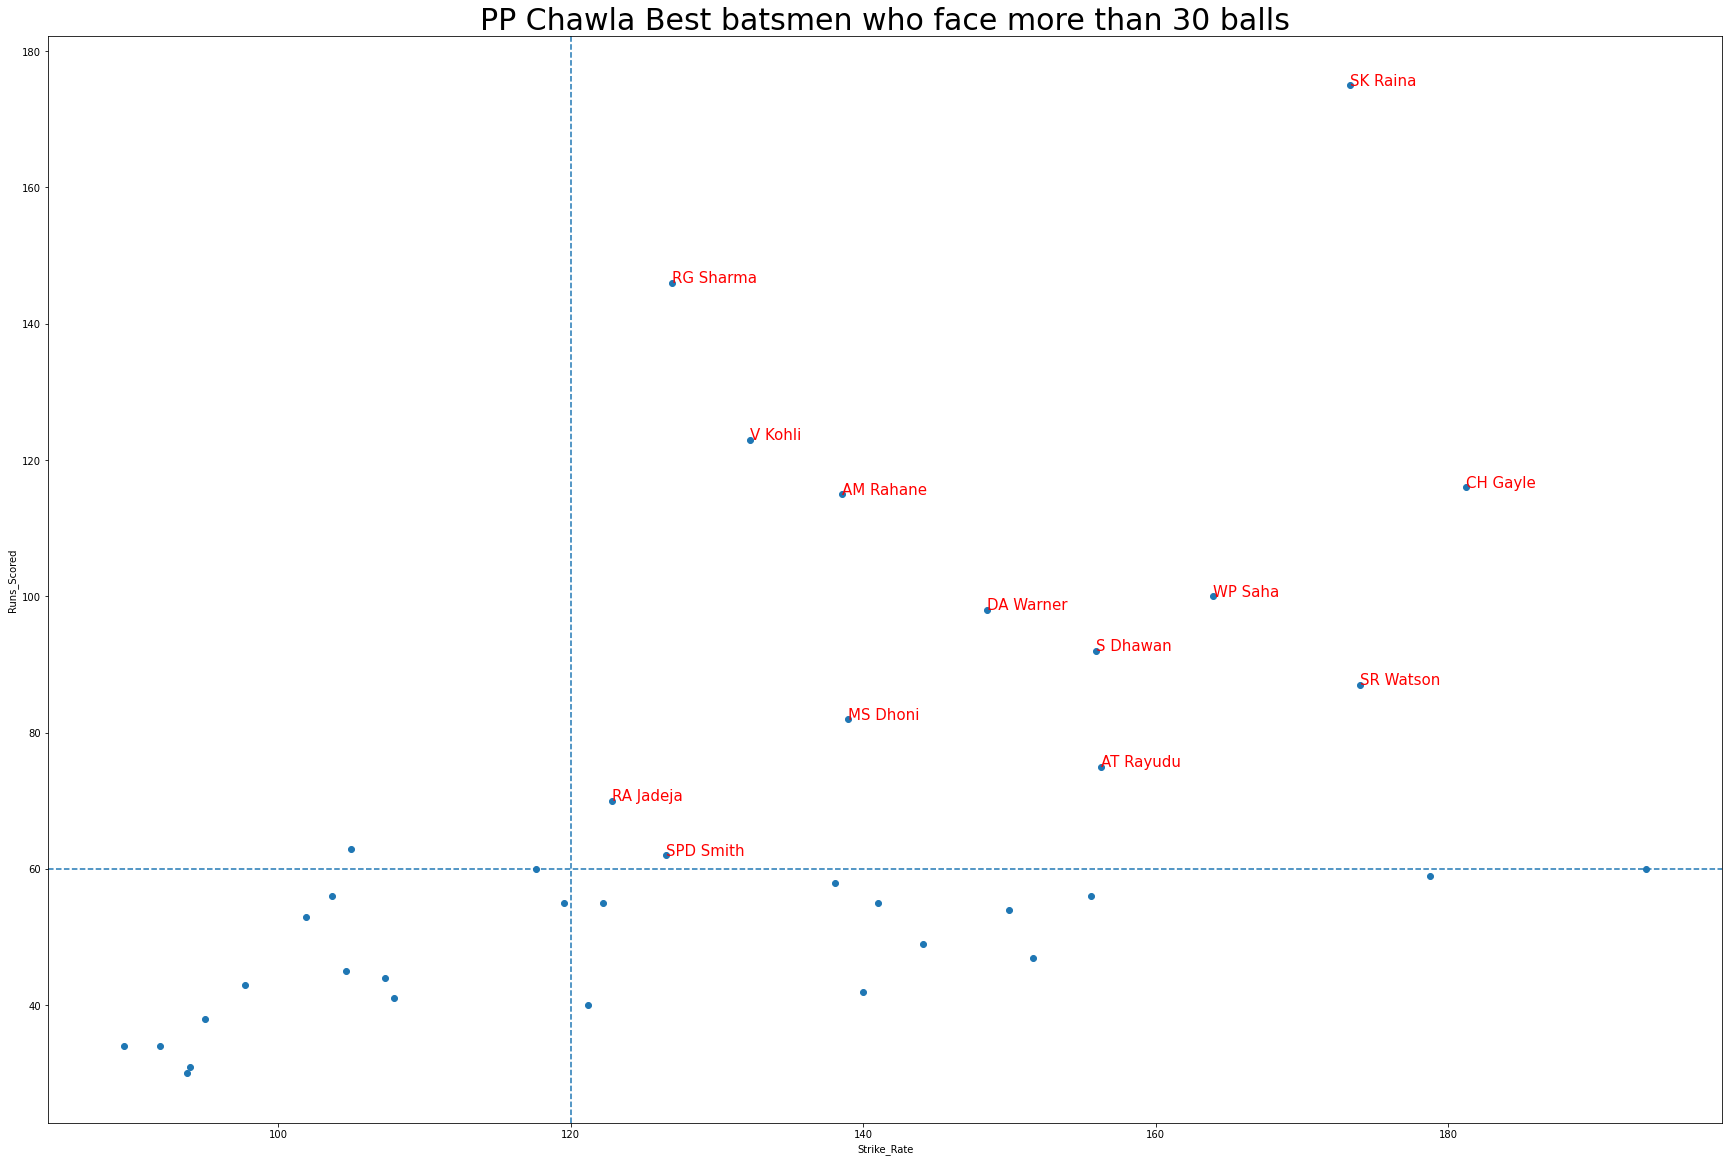

In [11]:
bowlersBestBatsman = pd.DataFrame(bowlersBestBatsman('PP Chawla',df))

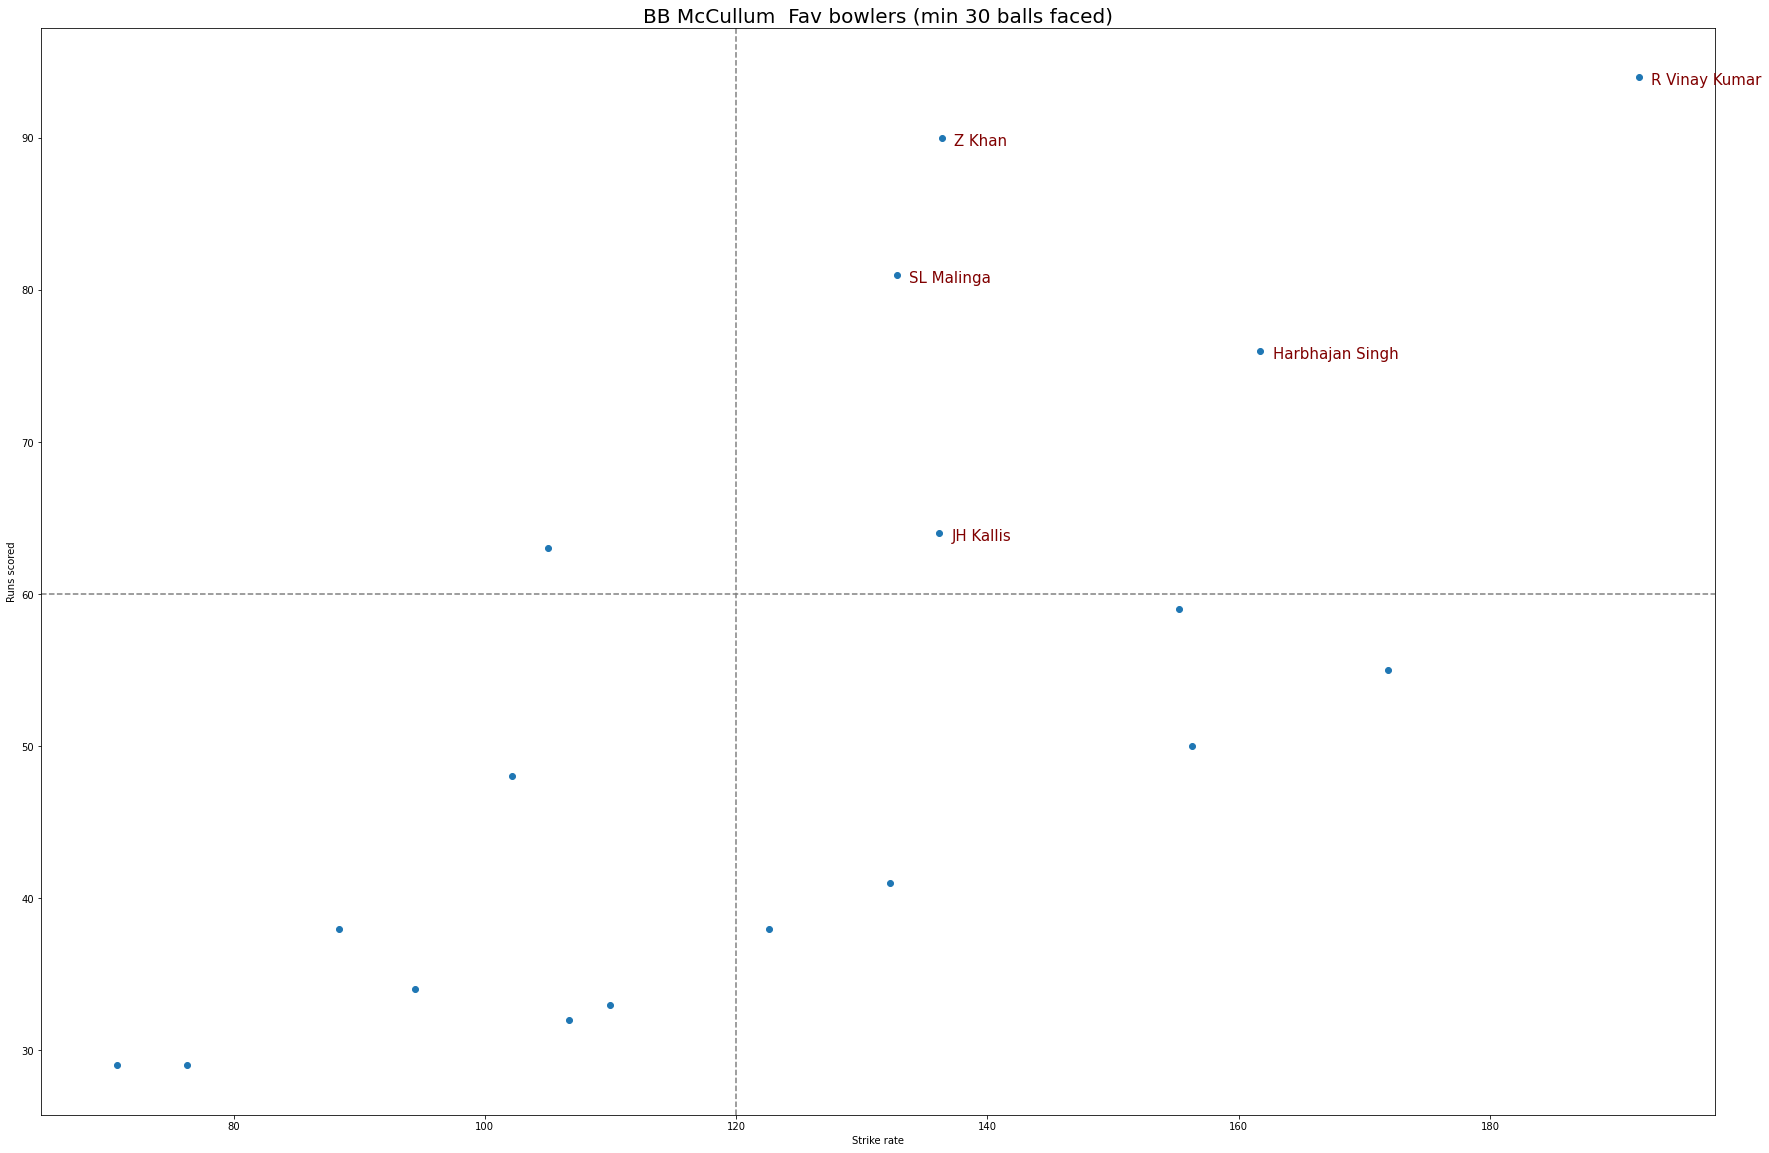

In [12]:
batsmanFavBowler = pd.DataFrame(batsmanFavBowler('BB McCullum',df))